### I. Data Ingestion

In [4]:
import pandas as pd

excel_file = pd.ExcelFile("../data/Beta Occupational Hazards Dataset_Dec2023.xlsx")
sheet_names = excel_file.sheet_names
sheet_names

['Information', 'BOHD Dataset', 'Variable descriptions', 'Exclusions']

In [7]:
variable_desc_df = pd.read_excel("../data/Beta Occupational Hazards Dataset_Dec2023.xlsx", sheet_name='Variable descriptions', skiprows=3)
variable_desc_df[['Variable', 'Type']].head()

,Variable,Type
0,Electronic Mail,Communication
1,Face-to-Face Discussions,Communication
2,Letters and Memos,Communication
3,Public Speaking,Communication
4,Telephone,Communication


In [9]:
bohd_df = pd.read_excel("../data/Beta Occupational Hazards Dataset_Dec2023.xlsx", sheet_name='BOHD Dataset', skiprows=1)
bohd_df.head()

,Occupation title,ANZSCO code,Electronic Mail,Face-to-Face Discussions,Letters and Memos,Public Speaking,Telephone,Contact With Others,Deal With Physically Aggressive People,Deal With Unpleasant or Angry People,...,Time Pressure,Work Schedules,Degree of Automation,Importance of Being Exact or Accurate,Importance of Repeating Same Tasks,Structured versus Unstructured Work,Employment ('000),Serious claims,Incidence rate,Frequency rate
0,Chief Executives and Managing Directors,1111,100.00,99.50,83.25,59.75,100.00,95.00,21.5,64.25,...,80.00,15.0,42.00,79.00,55.75,99.50,49.490481,370.8,8.359,3.966
1,General Managers,1112,96.25,98.75,73.75,46.75,98.25,94.75,11.0,61.00,...,80.50,7.5,31.75,74.75,64.75,95.00,95.454801,297.8,5.246,2.578
2,Crop Farmers,1212,59.75,95.75,43.75,23.25,78.00,81.75,4.0,30.50,...,62.25,37.0,33.50,62.25,51.50,88.25,35.087945,125.8,5.75,2.599
3,Livestock Farmers,1213,59.75,95.75,43.75,23.25,78.00,81.75,4.0,30.50,...,62.25,37.0,33.50,62.25,51.50,88.25,80.645590,259.2,7.93,3.66
4,Mixed Crop and Livestock Farmers,1214,59.75,95.75,43.75,23.25,78.00,81.75,4.0,30.50,...,62.25,37.0,33.50,62.25,51.50,88.25,25.413240,38,3.686,1.456


### II. Data Cleaning and Preprocessing

In [10]:
# Checking for missing values
bohd_df.isna().sum()

Occupation title                       0
ANZSCO code                            0
Electronic Mail                        0
Face-to-Face Discussions               0
Letters and Memos                      0
                                      ..
Structured versus Unstructured Work    0
Employment ('000)                      0
Serious claims                         0
Incidence rate                         0
Frequency rate                         0
Length: 63, dtype: int64

In [11]:
bohd_df.dtypes

Occupation title                        object
ANZSCO code                              int64
Electronic Mail                        float64
Face-to-Face Discussions               float64
Letters and Memos                      float64
                                        ...   
Structured versus Unstructured Work    float64
Employment ('000)                      float64
Serious claims                          object
Incidence rate                          object
Frequency rate                          object
Length: 63, dtype: object

In [12]:
# Convert risk scores to numeric format (float64)
bohd_df["Serious claims"] = pd.to_numeric(bohd_df["Serious claims"], errors="coerce")
bohd_df["Incidence rate"] = pd.to_numeric(bohd_df["Incidence rate"], errors="coerce")
bohd_df["Frequency rate"] = pd.to_numeric(bohd_df["Frequency rate"], errors="coerce")

In [13]:
bohd_df[["Serious claims", "Incidence rate", "Frequency rate"]].dtypes

Serious claims    float64
Incidence rate    float64
Frequency rate    float64
dtype: object

In [14]:
# Standardize column names: lowercase, replace spaces with underscores, remove special characters
bohd_df.columns = (
    bohd_df.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^a-zA-Z0-9_]", "", regex=True)
)

In [15]:
bohd_df.head()

,occupation_title,anzsco_code,electronic_mail,facetoface_discussions,letters_and_memos,public_speaking,telephone,contact_with_others,deal_with_physically_aggressive_people,deal_with_unpleasant_or_angry_people,...,time_pressure,work_schedules,degree_of_automation,importance_of_being_exact_or_accurate,importance_of_repeating_same_tasks,structured_versus_unstructured_work,employment_000,serious_claims,incidence_rate,frequency_rate
0,Chief Executives and Managing Directors,1111,100.00,99.50,83.25,59.75,100.00,95.00,21.5,64.25,...,80.00,15.0,42.00,79.00,55.75,99.50,49.490481,370.8,8.359,3.966
1,General Managers,1112,96.25,98.75,73.75,46.75,98.25,94.75,11.0,61.00,...,80.50,7.5,31.75,74.75,64.75,95.00,95.454801,297.8,5.246,2.578
2,Crop Farmers,1212,59.75,95.75,43.75,23.25,78.00,81.75,4.0,30.50,...,62.25,37.0,33.50,62.25,51.50,88.25,35.087945,125.8,5.750,2.599
3,Livestock Farmers,1213,59.75,95.75,43.75,23.25,78.00,81.75,4.0,30.50,...,62.25,37.0,33.50,62.25,51.50,88.25,80.645590,259.2,7.930,3.660
4,Mixed Crop and Livestock Farmers,1214,59.75,95.75,43.75,23.25,78.00,81.75,4.0,30.50,...,62.25,37.0,33.50,62.25,51.50,88.25,25.413240,38.0,3.686,1.456


### III. SQL Queries & Transformations

In [16]:
bohd_clean = bohd_df.copy()

#### WHS Risk Grouping Approach  

To better understand WHS exposure risks across occupations, I grouped key indicators into two categories:

**1. Physical hazards** - exposures that pose a direct risk to the body (e.g., manual handling, environmental conditions).  
**2. Psychosocial hazards** – factors that affect mental and emotional wellbeing (e.g., time pressure, conflict, cognitive demands).

For each occupation, I calculated an average exposure score for both groups by taking the mean of the relevant variables. This method aligns with Safe Work Australia’s approach to assessing WHS risks from a multi-dimensional perspective.

In [17]:
physical_hazard_cols = [
    "spend_time_bending_or_twisting_the_body",
    "spend_time_climbing_ladders_scaffolds_or_poles",
    "spend_time_keeping_or_regaining_balance",
    "spend_time_kneeling_crouching_stooping_or_crawling",
    "spend_time_making_repetitive_motions",
    "spend_time_standing",
    "spend_time_walking_and_running",
    "spend_time_using_your_hands_to_handle_control_or_feel_objects_tools_or_controls",
    "cramped_work_space_awkward_positions",
    "exposed_to_contaminants",
    "exposed_to_whole_body_vibration",
    "extremely_bright_or_inadequate_lighting",
    "sounds_noise_levels_are_distracting_or_uncomfortable",
    "very_hot_or_cold_temperatures",
    "exposed_to_disease_or_infections",
    "exposed_to_hazardous_conditions",
    "exposed_to_hazardous_equipment",
    "exposed_to_high_places",
    "exposed_to_minor_burns_cuts_bites_or_stings",
    "exposed_to_radiation",
    "wear_common_protective_or_safety_equipment_such_as_safety_shoes_glasses_gloves_hearing_protection_hard_hats_or_life_jackets",
    "wear_specialized_protective_or_safety_equipment_such_as_breathing_apparatus_safety_harness_full_protection_suits_or_radiation_protection",
    "in_an_enclosed_vehicle_or_equipment",
    "in_an_open_vehicle_or_equipment"
]


psychosocial_hazard_cols = [
    "deal_with_physically_aggressive_people",
    "deal_with_unpleasant_or_angry_people",
    "frequency_of_conflict_situations",
    "responsibility_for_outcomes_and_results",
    "responsible_for_others_health_and_safety",
    "coordinate_or_lead_others",
    "deal_with_external_customers",
    "work_with_work_group_or_team",
    "physical_proximity",
    "level_of_competition",
    "consequence_of_error",
    "freedom_to_make_decisions",
    "frequency_of_decision_making",
    "impact_of_decisions_on_coworkers_or_company_results",
    "time_pressure",
    "pace_determined_by_speed_of_equipment",
    "work_schedules",
    "structured_versus_unstructured_work",
    "importance_of_repeating_same_tasks",
    "importance_of_being_exact_or_accurate",
    "degree_of_automation"
]

In [18]:
# Create aggregate measures
bohd_clean["physical_hazard_score"] = bohd_clean[physical_hazard_cols].mean(axis=1, skipna=True)
bohd_clean["psychosocial_hazard_score"] = bohd_clean[psychosocial_hazard_cols].mean(axis=1, skipna=True)

In [19]:
import sqlite3

# Load into an in-memory SQLite database for querying
conn = sqlite3.connect(":memory:")
bohd_clean.to_sql("bohd", conn, index=False, if_exists="replace")

318

#### Investigating WHS Risk Exposure in WA Occupations   

The goal of this analysis is to support WorkSafe WA in identifying priority areas for inspection, education, and policy targeting; with a focus on occupations that may be under-recognized yet high-risk.

By leveraging both exposure indicators and claims data, the following questions and queries guide our investigation into workplace health and safety risks:

**1. Which occupations in WA are at highest risk for workplace injury or harm?**

- "Other Construction and Mining Labourers" and "Other Cleaners" top the list with the highest incidence rates of workplace injury or harm in WA. These are followed by hospitality and factory process workers, highlighting risk-prone roles across manual labor and service sectors.

- Despite differences in job type, many of these occupations share moderate to high physical and psychosocial hazard scores, suggesting a combination of bodily strain and mental stressors contribute to the risk profile.

- Notably, "Prison Officers" stand out with a higher psychosocial hazard score (68.18), indicating elevated mental/emotional exposure.

In [20]:
query = """
SELECT occupation_title, anzsco_code, incidence_rate, frequency_rate, physical_hazard_score, psychosocial_hazard_score
FROM bohd
WHERE incidence_rate IS NOT NULL
ORDER BY incidence_rate DESC
LIMIT 10;
"""

highest_risk = pd.read_sql_query(query, conn)
highest_risk.index = highest_risk.index + 1
highest_risk

,occupation_title,anzsco_code,incidence_rate,frequency_rate,physical_hazard_score,psychosocial_hazard_score
1,Other Construction and Mining Labourers,8219,136.528,62.982,64.250000,61.309524
2,Other Cleaners,8116,111.202,76.376,38.947917,49.809524
3,Other Hospitality Workers,4319,105.839,112.210,29.760417,53.607143
4,Other Factory Process Workers,8399,86.932,51.878,45.802083,49.071429
5,Prison Officers,4421,78.678,42.993,30.322917,68.178571
6,Vending Machine Attendants,8997,72.486,53.386,34.927083,48.988095
7,Food Trades Assistants,8512,72.305,67.685,29.593750,60.547619
8,Timber and Wood Process Workers,8394,72.104,42.291,36.854167,47.880952
9,Industrial Spraypainters,7112,66.835,34.115,49.041667,49.761905
10,Forestry and Logging Workers,8413,60.916,32.678,38.156250,59.107143


**2. Which occupations are most exposed to physical aggression?**

- The data shows that Police and Prison Officers face the highest levels of physical conflict, followed closely by legal professionals, social workers, and nurses.

- These roles consistently involve direct, high-stakes contact with the public, often in emotionally charged or confrontational situations.

- Interestingly, even white-collar and care-oriented roles like counsellors and psychiatrists appear in the top 10. This tells us that physical aggression exposure isn't limited to frontline enforcement roles.

In [21]:
conflict_cols = [
    "deal_with_physically_aggressive_people",
    "deal_with_unpleasant_or_angry_people",
    "frequency_of_conflict_situations"
]

bohd_clean["conflictual_contact_score"] = bohd_clean[conflict_cols].mean(axis=1, skipna=True)
bohd_clean.to_sql("bohd", conn, index=False, if_exists="replace")

318

In [22]:
query = """
SELECT occupation_title, anzsco_code, conflictual_contact_score
FROM bohd
WHERE conflictual_contact_score IS NOT NULL
ORDER BY conflictual_contact_score DESC
LIMIT 10;
"""

physical_exp = pd.read_sql_query(query, conn)
physical_exp.index = physical_exp.index + 1
physical_exp

,occupation_title,anzsco_code,conflictual_contact_score
1,Police,4413,83.750000
2,Prison Officers,4421,82.166667
3,Judicial and Other Legal Professionals,2712,78.000000
4,Social Workers,2725,77.750000
5,Commissioned Officers (Management),1391,76.666667
6,Travel Attendants,4517,73.166667
7,Psychiatrists,2534,72.083333
8,Enrolled and Mothercraft Nurses,4114,64.250000
9,Registered Nurses,2544,63.250000
10,Counsellors,2721,59.333333


**3. Which white collar jobs are most exposed to cognitive/emotional stress?**

*To estimate emotional stress exposure across occupations, I combined indicators such as time pressure, decision-making frequency, competitive environment, and impact of mistakes. These factors contribute to cumulative workplace stress, even in roles with low physical hazard. 

- The data shows that Chief Executives, Policy and Planning Managers, and various health professionals (e.g. Podiatrists, GPs, Pharmacists) are among the most exposed to cumulative emotional stress.

- These roles are usually high-responsibility, decision-intensive, and often operate in high-stakes environments - contributing to elevated cognitive load, time pressure, and the consequences of error.

In [23]:
emotional_stress_cols = [
    "level_of_competition",
    "consequence_of_error",
    "freedom_to_make_decisions",
    "frequency_of_decision_making",
    "impact_of_decisions_on_coworkers_or_company_results",
    "time_pressure",
    "structured_versus_unstructured_work"
]

bohd_clean["emotional_stress_score"] = bohd_clean[emotional_stress_cols].mean(axis=1, skipna=True)
bohd_clean.to_sql("bohd", conn, index=False, if_exists="replace")

318

In [24]:
query = """
SELECT occupation_title, anzsco_code, emotional_stress_score
FROM bohd
WHERE emotional_stress_score IS NOT NULL
ORDER BY emotional_stress_score DESC
LIMIT 10;
"""

psychosocial_exp = pd.read_sql_query(query, conn)
psychosocial_exp.index = psychosocial_exp.index + 1
psychosocial_exp

,occupation_title,anzsco_code,emotional_stress_score
1,Chief Executives and Managing Directors,1111,87.500000
2,Policy and Planning Managers,1324,87.500000
3,Podiatrists,2526,87.428571
4,General Practitioners and Resident Medical Off...,2531,86.750000
5,Pharmacists,2515,86.285714
6,Dental Practitioners,2523,85.821429
7,Anaesthetists,2532,85.571429
8,Judicial and Other Legal Professionals,2712,85.285714
9,Real Estate Sales Agents,6121,83.500000
10,Barristers,2711,83.392857


**4. What are the top 10 physcially hazardous jobs across all dimensions of physical exposure and how do they overlap with serious injury claims?**

- The most physically hazardous occupations are heavily concentrated in the construction, electrical, and emergency response sectors. Electricians, Structural Steel Workers, and Other Construction Labourers top the list, with both high hazard scores and serious injury claims.

- This overlap highlights a clear alignment between physical exposure risks and actual harm outcomes, reinforcing the need for continued WHS attention in these hands-on, high-exertion roles.

In [25]:
query = """
SELECT 
    occupation_title, 
    anzsco_code,
    physical_hazard_score, 
    serious_claims, 
    incidence_rate,
    frequency_rate
FROM bohd
WHERE physical_hazard_score IS NOT NULL AND serious_claims IS NOT NULL
ORDER BY physical_hazard_score DESC, serious_claims DESC
LIMIT 10;
"""

hazardous = pd.read_sql_query(query, conn)
hazardous.index = hazardous.index + 1
hazardous

,occupation_title,anzsco_code,physical_hazard_score,serious_claims,incidence_rate,frequency_rate
1,Electricians,3411,70.937500,1476.4,10.550,5.247
2,Electrical Distribution Trades Workers,3422,68.968750,158.4,16.196,8.270
3,Structural Steel Construction Workers,8217,68.833333,699.2,30.047,14.421
4,Other Construction and Mining Labourers,8219,64.250000,1080.4,136.528,62.982
5,Bricklayers and Stonemasons,3311,64.208333,370.4,22.604,11.868
6,Concreters,8212,61.500000,603.4,20.585,10.423
7,Plumbers,3341,61.302083,1329.4,18.310,9.149
8,Fire and Emergency Workers,4412,60.447917,981.4,51.940,30.418
9,Fencers,8213,59.864583,181.2,32.265,17.825
10,Railway Track Workers,8216,59.072917,91.6,18.047,8.663


**5. What are the top 10 mentally/emotionally demanding jobs across multiple stress-related factors?**
- Roles like Travel Attendants, Commissioned Officers, and Dental Practitioners top the list for psychosocial hazard exposure, driven by high emotional demands, time pressure, and decision-making strain.

- While some roles (e.g. Police, Air Transport Professionals) show both high psychosocial scores and serious injury claims, roles like Anaesthetists and Executives carry heavy stress with relatively lower physical risk, suggesting hidden mental tolls.

- This highlights the need for WHS strategies to also address psychosocial risk, not just physical harm.

In [26]:
query = """
SELECT 
    occupation_title, 
    anzsco_code,
    psychosocial_hazard_score, 
    serious_claims, 
    incidence_rate,
    frequency_rate
FROM bohd
WHERE psychosocial_hazard_score IS NOT NULL
ORDER BY psychosocial_hazard_score DESC
LIMIT 10;
"""

stress = pd.read_sql_query(query, conn)
stress.index = stress.index + 1
stress

,occupation_title,anzsco_code,psychosocial_hazard_score,serious_claims,incidence_rate,frequency_rate
1,Travel Attendants,4517,74.178571,190.6,21.785,18.681
2,Commissioned Officers (Management),1391,72.428571,13.0,5.502,3.086
3,Dental Practitioners,2523,72.238095,29.8,2.481,1.534
4,Pharmacists,2515,71.261905,50.4,1.598,1.016
5,Air Transport Professionals,2311,70.130952,257.8,17.068,11.010
6,Police,4413,69.857143,2828.2,46.852,26.934
7,Anaesthetists,2532,69.440476,7.4,1.897,1.146
8,Chief Executives and Managing Directors,1111,69.119048,370.8,8.359,3.966
9,Policy and Planning Managers,1324,69.119048,18.6,0.731,0.397
10,Judicial and Other Legal Professionals,2712,69.000000,35.8,3.207,2.001


**6. Are there “silent risk” occupations? (Jobs with moderate hazard exposure but high claim frequency)**

*The query highlights roles that may appear safe on paper but produce injuries often, indicating possible gaps in training, task design, or safety practices. These roles are important to target because they can be overlooked in standard WHS risk assessments. Frequency rate is used because it adjusts for hours worked, making it a better indicator of how often injuries occur during actual working time, especially in part-time or casual roles where incidence rates may underestimate true risk.

- Hospitality Workers, Cleaners, and Vending Machine Attendants show moderate physical and psychosocial hazard scores but high injury frequency and serious claims.

- These “silent risk” jobs may appear low-risk on paper yet result in frequent harm, likely due to gaps in training, oversight, or role design. They can be easily overlooked in traditional WHS assessments, making them key candidates for targeted safety interventions.

In [27]:
# Calculate percentiles in Python
p50_physical = bohd_clean["physical_hazard_score"].quantile(0.5)
p50_psychosocial = bohd_clean["psychosocial_hazard_score"].quantile(0.5)
p75_frequency = bohd_clean["frequency_rate"].quantile(0.75)

In [28]:
query = f"""
SELECT 
    occupation_title, 
    anzsco_code,
    physical_hazard_score, 
    psychosocial_hazard_score, 
    frequency_rate,
    incidence_rate,
    serious_claims
FROM bohd
WHERE 
    (physical_hazard_score <= {p50_physical} OR psychosocial_hazard_score <= {p50_psychosocial})
    AND frequency_rate >= {p75_frequency}
ORDER BY frequency_rate DESC
LIMIT 10;
"""

silent_risk = pd.read_sql_query(query, conn)
silent_risk.index = silent_risk.index + 1
silent_risk

,occupation_title,anzsco_code,physical_hazard_score,psychosocial_hazard_score,frequency_rate,incidence_rate,serious_claims
1,Other Hospitality Workers,4319,29.760417,53.607143,112.210,105.839,590.6
2,Other Cleaners,8116,38.947917,49.809524,76.376,111.202,1036.8
3,Vending Machine Attendants,8997,34.927083,48.988095,53.386,72.486,399.6
4,Other Factory Process Workers,8399,45.802083,49.071429,51.878,86.932,1152.8
5,Timber and Wood Process Workers,8394,36.854167,47.880952,42.291,72.104,349.4
6,Other Miscellaneous Clerical and Administrativ...,5999,15.625000,51.023810,38.209,57.601,1093.6
7,Industrial Spraypainters,7112,49.041667,49.761905,34.115,66.835,391.2
8,Plastics and Rubber Factory Workers,8392,48.125000,51.595238,32.603,59.785,168.6
9,Caretakers,8991,38.947917,49.809524,29.391,41.897,233.0
10,Nursing Support and Personal Care Workers,4233,26.750000,54.273810,29.102,37.757,3789.0


**7. How can we prioritise sectors or occupations for targeted WHS campaigns or inspection focus?**

To answer this, we need a single, calculated score that summarizes multiple WHS risk indicators into one overall risk score per occupation. This allows us to rank jobs based on both actual harm (injuries) and exposure to dangerous or stressful conditions. 
WHS risk isn't just about how many claims are lodged but also about the conditions that lead to harm, such as physical aggression and psychosocial strain. Therefore, the risk score formula blends hard outcome data (injury incidence) and hazard exposure indicators (aggression and stress). 

**Risk Score Formula (Weighted Composite):**  
Risk Score = 
    0.4 × incidence_rate_norm +
    0.3 × physical_hazard_score_norm +
    0.3 × psychosocial_hazard_score_norm

- 0.4: Injury Incidence Rate
Represents the measurable outcomes of workplace harm. It carries the most weight because actual injuries are critical to WHS prioritisation.

- 0.3: Physical Score
Captures exposure to physical or verbal aggression, a strong predictor of psychological injury and workplace harm.

- 0.3: Psychosocial Hazard Score
Reflects workload-related stress and deadline pressure, which are key psychosocial hazards often linked to burnout and errors.

This score helps flag jobs that may not rank high in injury claims alone but are still high-risk when broader WHS exposures are considered.


- By combining injury incidence, aggression/ physical exposure, and psychosocial pressure into a single risk score, we can clearly identify occupations with the highest overall WHS risk.

- Construction and emergency response roles dominate the top of the list, with "Other Construction and Mining Labourers" and "Fire and Emergency Workers" leading the ranking. These roles score high across both exposure indicators and actual harm outcomes.

- The composite risk score provides a more holistic way to prioritise occupations for inspection, education, and policy focus, capturing both physical and psychosocial WHS risks in one metric.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

bohd_norm = bohd_clean.copy()

# Normalize
cols_to_norm = ["incidence_rate", "physical_hazard_score", "psychosocial_hazard_score"]
scaler = MinMaxScaler()
bohd_norm[[f"{col}_norm" for col in cols_to_norm]] = scaler.fit_transform(bohd_norm[cols_to_norm])

# Composite WHS risk score
bohd_norm["whs_composite_risk_score"] = (
    0.4 * bohd_norm["incidence_rate_norm"] +
    0.3 * bohd_norm["physical_hazard_score_norm"] +
    0.3 * bohd_norm["psychosocial_hazard_score_norm"]
)

bohd_norm.to_sql("bohd", conn, index=False, if_exists="replace")

318

In [30]:
query = """
SELECT 
    occupation_title,
    anzsco_code,
    employment_000,
    incidence_rate,
    physical_hazard_score,
    psychosocial_hazard_score,
    whs_composite_risk_score
FROM bohd
WHERE whs_composite_risk_score IS NOT NULL
ORDER BY whs_composite_risk_score DESC
LIMIT 10;
"""

composite_score = pd.read_sql_query(query, conn)
composite_score.index = composite_score.index + 1
composite_score

,occupation_title,anzsco_code,employment_000,incidence_rate,physical_hazard_score,psychosocial_hazard_score,whs_composite_risk_score
1,Other Construction and Mining Labourers,8219,6.224452,136.528,64.250000,61.309524,0.865431
2,Fire and Emergency Workers,4412,18.271190,51.940,60.447917,66.238095,0.639869
3,Travel Attendants,4517,11.023183,21.785,58.916667,74.178571,0.608697
4,Prison Officers,4421,23.506455,78.678,30.322917,68.178571,0.596949
5,Police,4413,74.074985,46.852,44.875000,69.857143,0.583377
6,Other Cleaners,8116,12.057314,111.202,38.947917,49.809524,0.582952
7,Electrical Distribution Trades Workers,3422,9.239980,16.196,68.968750,67.369048,0.582930
8,Structural Steel Construction Workers,8217,20.500937,30.047,68.833333,60.000000,0.563313
9,Other Hospitality Workers,4319,6.778919,105.839,29.760417,53.607143,0.556151
10,Fencers,8213,11.055601,32.265,59.864583,62.964286,0.553003


In [32]:
# Only add the new normalized and composite score columns back to bohd_clean
new_cols = [
    "incidence_rate_norm",
    "physical_hazard_score_norm",
    "psychosocial_hazard_score_norm",
    "whs_composite_risk_score"
]

bohd_clean = bohd_clean.merge(bohd_norm[["occupation_title"] + new_cols], on="occupation_title", how="left")

In [33]:
bohd_clean.head()

,occupation_title,anzsco_code,electronic_mail,facetoface_discussions,letters_and_memos,public_speaking,telephone,contact_with_others,deal_with_physically_aggressive_people,deal_with_unpleasant_or_angry_people,...,incidence_rate,frequency_rate,physical_hazard_score,psychosocial_hazard_score,conflictual_contact_score,emotional_stress_score,incidence_rate_norm,physical_hazard_score_norm,psychosocial_hazard_score_norm,whs_composite_risk_score
0,Chief Executives and Managing Directors,1111,100.00,99.50,83.25,59.75,100.00,95.00,21.5,64.25,...,8.359,3.966,20.614583,69.119048,54.083333,87.500000,0.060007,0.236809,0.863520,0.354101
1,General Managers,1112,96.25,98.75,73.75,46.75,98.25,94.75,11.0,61.00,...,5.246,2.578,22.114583,65.797619,46.750000,80.678571,0.037176,0.259558,0.773924,0.324915
2,Crop Farmers,1212,59.75,95.75,43.75,23.25,78.00,81.75,4.0,30.50,...,5.750,2.599,40.927083,57.214286,24.916667,69.035714,0.040872,0.544866,0.542389,0.342525
3,Livestock Farmers,1213,59.75,95.75,43.75,23.25,78.00,81.75,4.0,30.50,...,7.930,3.660,40.927083,57.214286,24.916667,69.035714,0.056861,0.544866,0.542389,0.348921
4,Mixed Crop and Livestock Farmers,1214,59.75,95.75,43.75,23.25,78.00,81.75,4.0,30.50,...,3.686,1.456,40.927083,57.214286,24.916667,69.035714,0.025735,0.544866,0.542389,0.336470


### IV. Exploratory Data Analysis

**Distribution of WHS Composite Risk Score**  

- The distribution of WHS Composite Risk Scores is skewed toward the lower end, meaning most occupations sit in the low to moderate risk range (around 0.2–0.4). There's a visible peak near 0.25, where the majority of roles cluster.
- As the scores increase, the number of occupations drops off — but those that do land above 0.6 represent a small but critical group of high-risk jobs. These roles combine elevated injury rates with significant physical and psychosocial exposure, making them clear priorities for WHS action.


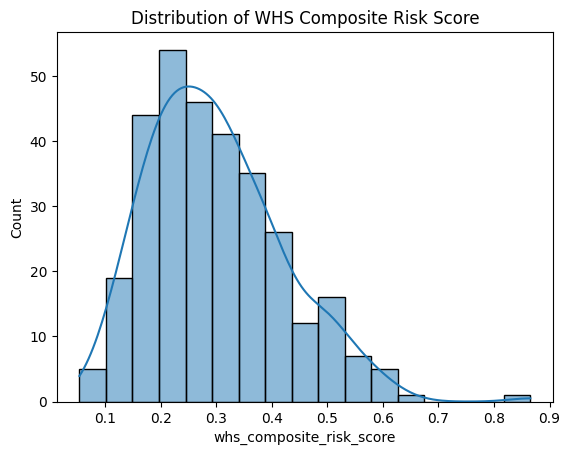

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(bohd_clean['whs_composite_risk_score'], kde=True)
plt.title("Distribution of WHS Composite Risk Score")
plt.show()

**Spread of scores across three WHS exposure dimensions: physical hazard, psychosocial hazard, and injury frequency.**  

- Physical hazard scores show a wide variation. Some jobs are very low-risk physically, while others face significant exposure.
- Psychosocial hazard scores tend to cluster at the higher end, with most roles sitting between 40–65, suggesting that emotional and mental strain is consistently high across many occupations.
- Frequency rate (how often injuries occur relative to hours worked) is highly skewed, with many outliers. This indicates that a small number of roles experience injury far more often than the rest, even when adjusting for time on the job.

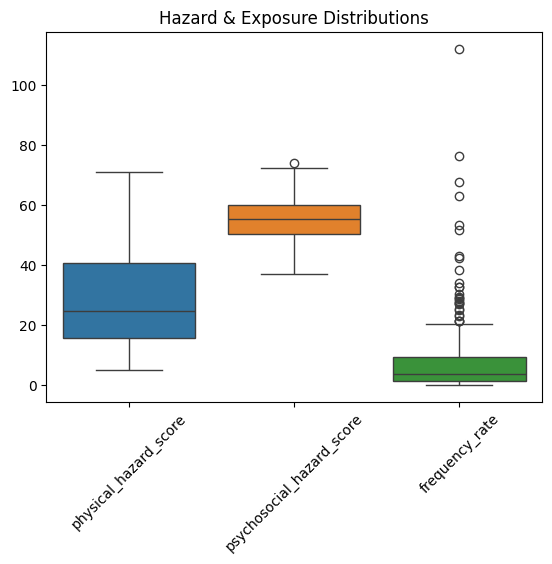

In [ ]:
sns.boxplot(data=bohd_clean[["physical_hazard_score", "psychosocial_hazard_score", "frequency_rate"]])
plt.title("Hazard & Exposure Distributions")
plt.xticks(rotation=45)
plt.show()

In [39]:
from datetime import datetime

# Create timestamped filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M")
output_filename = f"../output/bohd_clean{timestamp}.csv"

bohd_clean.to_csv(output_filename, index=False)

print(f"Saved final pipeline output to {output_filename}")

Saved final pipeline output to ../output/bohd_clean20250405_1748.csv
